# Tarea 4 - Introducción a la Biomecánica
### Pregunta 1

In [1]:
# Libraries
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from os.path import join
from scipy import integrate
from decimal import Decimal
import scipy.optimize as sp

In [2]:
# Paths
harmonic_path = join('data', 'harmonic.csv')
quasistatic_path = join('data', 'quasistatic.csv')

# Data windows
cycle_h = {
    '0': 3935,  # Start of the experiment
    'f': 4136,  # End of the experiment
    '1': 3956   # End of the first oscillation
}
cycle_q = {
    '0': 3620,  # Start of the experiment
    'f': 6700,  # End of the experiment
}

# Constants
g = 9.81
A = 7 * 10 ** (-6)

# Graphs
naranjo = '#F59A23'
azul = '#010589'
rojo = '#E40C2B'
fig_size = (8, 5)

In [3]:
# Import data
harmonic = pd.read_csv(harmonic_path, skiprows=[0, 1, 2, 4])
quasistatic = pd.read_csv(quasistatic_path, skiprows=[0, 1, 2, 4])
quasistatic.head()

,Elapsed Time,Disp,Load 3
0,0.00,1.064,-7.61
1,0.01,1.065,-7.53
2,0.02,1.069,-7.50
3,0.03,1.074,-7.26
4,0.04,1.079,-6.67


In [4]:
# Remove spaces from column names
quasistatic.rename(columns=lambda x: x.strip(), inplace=True)
harmonic.rename(columns=lambda x: x.strip(), inplace=True)

In [5]:
# Check data
quasistatic.loc[:, 'Elapsed Time']

0        0.00
1        0.01
2        0.02
3        0.03
4        0.04
        ...  
8536    85.36
8537    85.37
8538    85.38
8539    85.39
8540    85.40
Name: Elapsed Time, Length: 8541, dtype: float64

In [6]:
# Data columns
time_q = quasistatic.loc[:, 'Elapsed Time']
disp_q = quasistatic.loc[:, 'Disp']
load_q = quasistatic.loc[:, 'Load 3']

str_q = (load_q * g / 1000) / A                                 # Stress
def_q = (disp_q - disp_q[cycle_q['0']]) / disp_q[cycle_q['0']]  # Deformation

time_h = harmonic.loc[:, 'Elapsed Time']
disp_h = harmonic.loc[:, 'Disp']
load_h = harmonic.loc[:, 'Load 3']

str_h = (load_h * g / 1000) / A                                 # Stress
def_h = (disp_h - disp_h[cycle_h['0']]) / disp_h[cycle_h['0']]  # Deformation

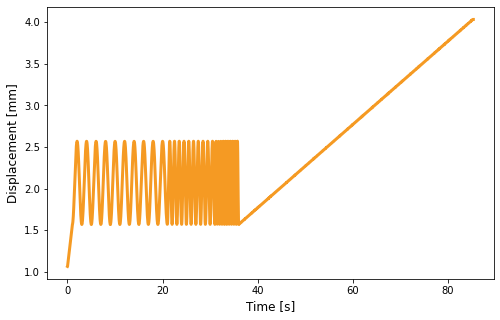

In [7]:
# Plot quasistatic data
fig = plt.figure(figsize=fig_size)
plt.plot(
    time_q,
    disp_q,
    color=naranjo,
    linewidth=3
)
plt.xlabel('Time [s]', fontsize=12)
plt.ylabel('Displacement [mm]', fontsize=12)
# plt.title('Quasistatic (Displacement vs. Time)', fontsize=14)
plt.show()

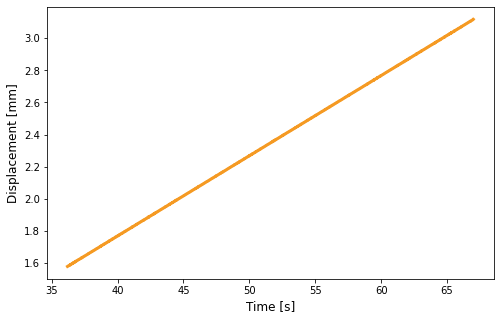

In [8]:
# Plot quasistatic data
fig = plt.figure(figsize=fig_size)
plt.plot(
    time_q[cycle_q['0']:cycle_q['f']],
    disp_q[cycle_q['0']:cycle_q['f']],
    color=naranjo,
    linewidth=3
)
plt.xlabel('Time [s]', fontsize=12)
plt.ylabel('Displacement [mm]', fontsize=12)
# plt.title('Quasistatic (Displacement vs. Time)', fontsize=14)
plt.show()

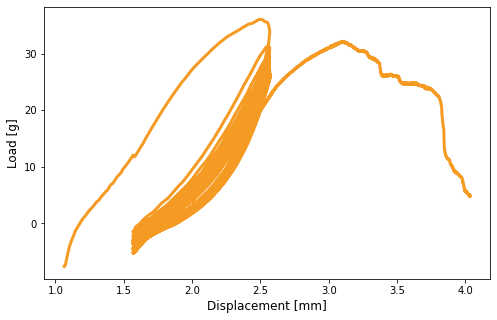

In [9]:
# Plot quasistatic data
fig = plt.figure(figsize=fig_size)
plt.plot(
    disp_q,
    load_q,
    color=naranjo,
    linewidth=3
)
plt.xlabel('Displacement [mm]', fontsize=12)
plt.ylabel('Load [g]', fontsize=12)
# plt.title('Quasistatic (Load vs. Displacement)', fontsize=14)
plt.show()

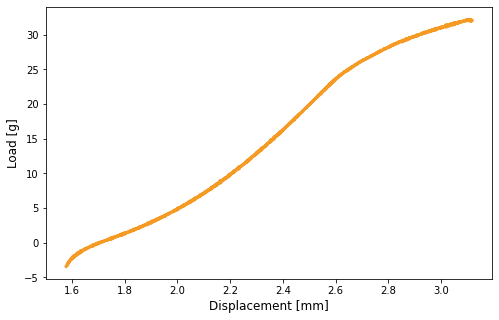

In [10]:
# Plot quasistatic data
fig = plt.figure(figsize=fig_size)
plt.plot(
    disp_q[cycle_q['0']:cycle_q['f']],
    load_q[cycle_q['0']:cycle_q['f']],
    color=naranjo,
    linewidth=3
)
plt.xlabel('Displacement [mm]', fontsize=12)
plt.ylabel('Load [g]', fontsize=12)
# plt.title('Quasistatic (Load vs. Displacement)', fontsize=14)
plt.show()

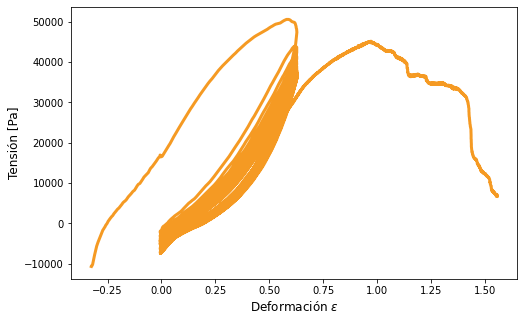

In [11]:
# Plot quasistatic data
fig = plt.figure(figsize=fig_size)
plt.plot(
    def_q,
    str_q,
    color=naranjo,
    linewidth=3
)
plt.xlabel(r'Deformación $\epsilon$', fontsize=12)
plt.ylabel('Tensión [Pa]', fontsize=12)
# plt.title('Quasistatic (Load vs. Displacement)', fontsize=14)
plt.show()

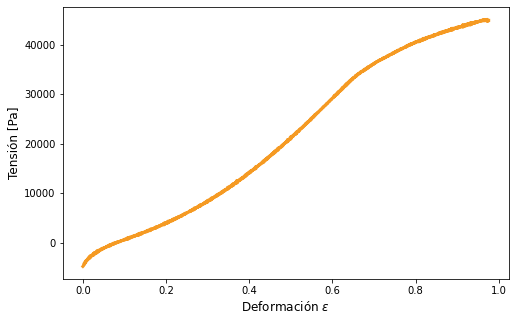

In [12]:
# Plot quasistatic data
fig = plt.figure(figsize=fig_size)
plt.plot(
    def_q[cycle_q['0']:cycle_q['f']],
    str_q[cycle_q['0']:cycle_q['f']],
    color=naranjo,
    linewidth=3
)
plt.xlabel(r'Deformación $\epsilon$', fontsize=12)
plt.ylabel('Tensión [Pa]', fontsize=12)
# plt.title('Quasistatic (Load vs. Displacement)', fontsize=14)
plt.show()

#### Caso Armónico

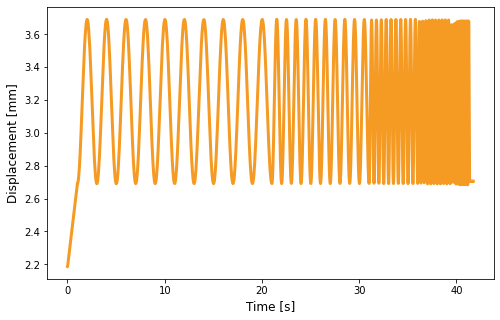

In [13]:
# Plot harmonic data
fig = plt.figure(figsize=fig_size)
plt.plot(
    time_h,
    disp_h,
    color=naranjo,
    linewidth=3
)
plt.xlabel('Time [s]', fontsize=12)
plt.ylabel('Displacement [mm]', fontsize=12)
# plt.title('Harmonic (Displacement vs. Time)', fontsize=14)
plt.show()

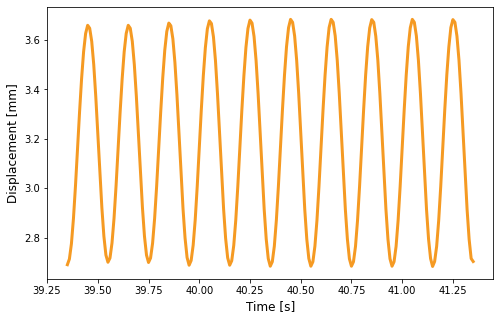

In [14]:
# Plot harmonic data
fig = plt.figure(figsize=fig_size)
plt.plot(
    time_h[cycle_h['0']:cycle_h['f']],
    disp_h[cycle_h['0']:cycle_h['f']],
    color=naranjo,
    linewidth=3
)
plt.xlabel('Time [s]', fontsize=12)
plt.ylabel('Displacement [mm]', fontsize=12)
# plt.title('Harmonic (Displacement vs. Time)', fontsize=14)
plt.show()

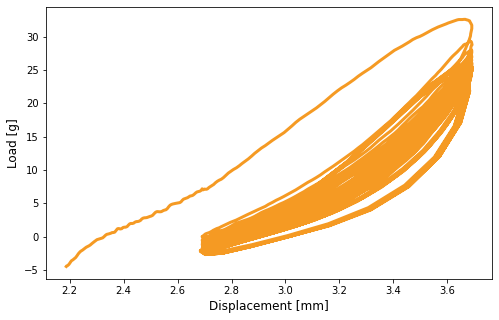

In [15]:
# Plot harmonic data
fig = plt.figure(figsize=fig_size)
plt.plot(
    disp_h,
    load_h,
    color=naranjo,
    linewidth=3
)
plt.xlabel('Displacement [mm]', fontsize=12)
plt.ylabel('Load [g]', fontsize=12)
# plt.title('Harmonic (Load vs. Displacement)', fontsize=14)
plt.show()

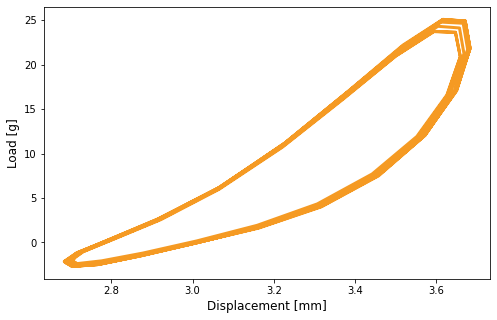

In [16]:
# Plot harmonic data
fig = plt.figure(figsize=fig_size)
plt.plot(
    disp_h[cycle_h['0']:cycle_h['f']],
    load_h[cycle_h['0']:cycle_h['f']],
    color=naranjo,
    linewidth=3
)
plt.xlabel('Displacement [mm]', fontsize=12)
plt.ylabel('Load [g]', fontsize=12)
# plt.title('Harmonic (Load vs. Displacement)', fontsize=14)
plt.show()

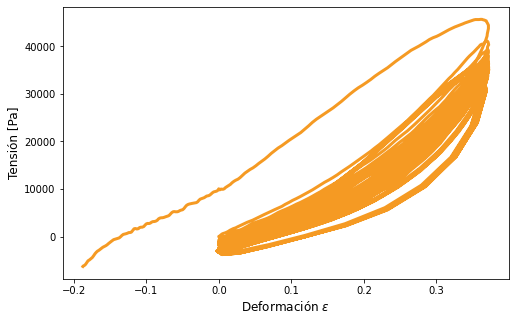

In [17]:
# Plot harmonic data
fig = plt.figure(figsize=fig_size)
plt.plot(
    def_h,
    str_h,
    color=naranjo,
    linewidth=3
)
plt.xlabel(r'Deformación $\epsilon$', fontsize=12)
plt.ylabel('Tensión [Pa]', fontsize=12)
plt.show()

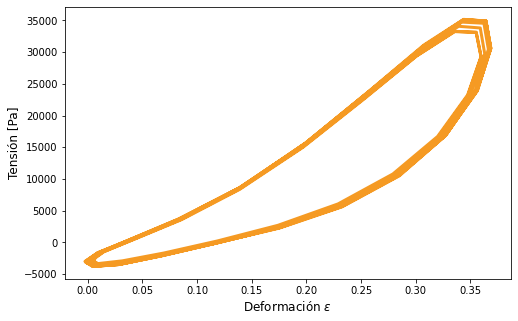

In [18]:
# Plot harmonic data
fig = plt.figure(figsize=fig_size)
plt.plot(
    def_h[cycle_h['0']:cycle_h['f']],
    str_h[cycle_h['0']:cycle_h['f']],
    color=naranjo,
    linewidth=3
)
plt.xlabel(r'Deformación $\epsilon$', fontsize=12)
plt.ylabel('Tensión [Pa]', fontsize=12)
plt.show()

### Pregunta 2

In [19]:
stretch_q =  disp_q / disp_q[cycle_q['0']]  # Stretch

#### Sólido Neohookeano incompresible

In [20]:
def neo_hookean(c, lam):
    try:
        return 2 * c * (lam ** 2 - 1 / lam)
    except ValueError:
        return 0

In [21]:
c_0 = 286

def error_nh(c, x, y):
    return abs(y - neo_hookean(c, x))

In [22]:
nh_c_fit, nh_cov = sp.leastsq(
    func=error_nh,
    x0=c_0,
    args=(
        stretch_q[cycle_q['0']:cycle_q['f']],
        str_q[cycle_q['0']:cycle_q['f']]
    )
)

In [23]:
nh_c_fit

array([7087.11157121])

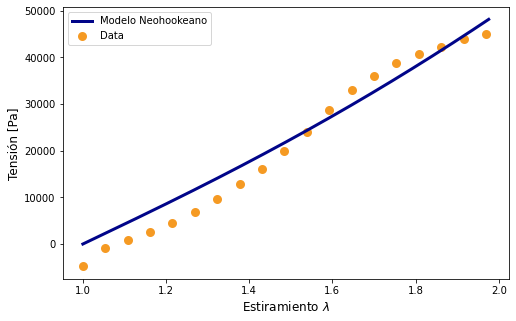

In [24]:
fig = plt.figure(figsize=fig_size)
plt.scatter(
    stretch_q[cycle_q['0']:cycle_q['f']:170],
    str_q[cycle_q['0']:cycle_q['f']:170],
    color=naranjo,
    linewidth=3,
    label='Data'
)
plt.plot(
    stretch_q[cycle_q['0']:cycle_q['f']],
    neo_hookean(nh_c_fit, stretch_q[cycle_q['0']:cycle_q['f']]),
    color=azul,
    linewidth=3,
    label='Modelo Neohookeano'
)
plt.legend()
plt.xlabel(r'Estiramiento $\lambda$', fontsize=12)
plt.ylabel('Tensión [Pa]', fontsize=12)
plt.show()

#### Sólido lineal estándar

In [25]:
global m
m = (stretch_q[cycle_q['f']] - stretch_q[cycle_q['0']]) / \
    (time_q[cycle_q['f']] - time_q[cycle_q['0']])

In [26]:
def lineal_standar(c, lam):
    mu, tau = c
    # return mu * (m + (lam - 1) / tau)
    return mu * (lam - 1) / tau

In [27]:
c_1 = [1, 1]

def error_sls(c, x, y):
    return abs(y - lineal_standar(c, x))

In [28]:
sls_c_fit, sls_cov_c = sp.leastsq(
    func=error_sls,
    x0=c_1,
    args=(
        stretch_q[cycle_q['0']:cycle_q['f']],
        str_q[cycle_q['0']:cycle_q['f']]
    )
)

In [29]:
sls_c_fit

array([9.63160930e+01, 2.05218646e-03])

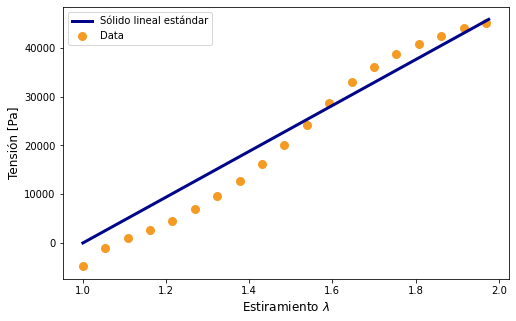

In [30]:
fig = plt.figure(figsize=fig_size)
plt.scatter(
    stretch_q[cycle_q['0']:cycle_q['f']:170],
    str_q[cycle_q['0']:cycle_q['f']:170],
    color=naranjo,
    linewidth=3,
    label='Data'
)
plt.plot(
    stretch_q[cycle_q['0']:cycle_q['f']],
    lineal_standar(sls_c_fit, stretch_q[cycle_q['0']:cycle_q['f']]),
    color=azul,
    linewidth=3,
    label='Sólido lineal estándar'
)
plt.legend()
plt.xlabel(r'Estiramiento $\lambda$', fontsize=12)
plt.ylabel('Tensión [Pa]', fontsize=12)
plt.show()

#### Sólido de Voight

#### Comparación de modelos

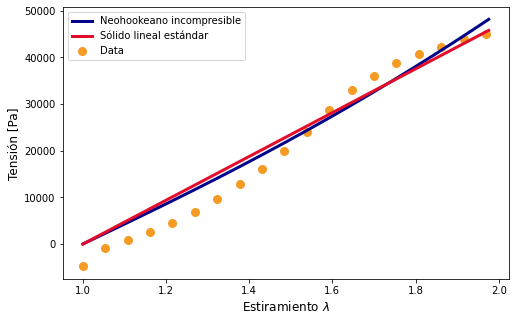

In [31]:
fig = plt.figure(figsize=fig_size)
plt.scatter(
    stretch_q[cycle_q['0']:cycle_q['f']:170],
    str_q[cycle_q['0']:cycle_q['f']:170],
    color=naranjo,
    linewidth=3,
    label='Data'
)
plt.plot(
    stretch_q[cycle_q['0']:cycle_q['f']],
    neo_hookean(nh_c_fit, stretch_q[cycle_q['0']:cycle_q['f']]),
    color=azul,
    linewidth=3,
    label='Neohookeano incompresible'
)
plt.plot(
    stretch_q[cycle_q['0']:cycle_q['f']],
    lineal_standar(sls_c_fit, stretch_q[cycle_q['0']:cycle_q['f']]),
    color=rojo,
    linewidth=3,
    label='Sólido lineal estándar'
)
plt.legend()
plt.xlabel(r'Estiramiento $\lambda$', fontsize=12)
plt.ylabel('Tensión [Pa]', fontsize=12)
plt.show()

### Pregunta 3

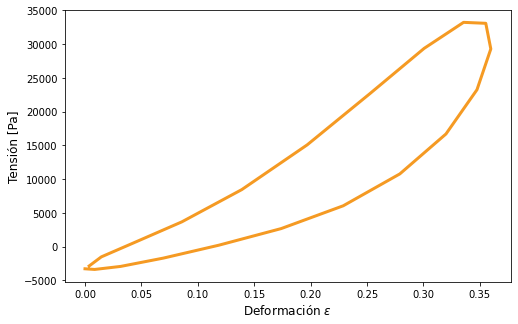

In [32]:
# Plot harmonic data
fig = plt.figure(figsize=fig_size)
plt.plot(
    def_h[cycle_h['0']:cycle_h['1']],
    str_h[cycle_h['0']:cycle_h['1']],
    color=naranjo,
    linewidth=3
)
plt.xlabel(r'Deformación $\epsilon$', fontsize=12)
plt.ylabel('Tensión [Pa]', fontsize=12)
plt.show()

In [33]:
# Integrate using Simpson's rule
# https://en.wikipedia.org/wiki/Simpson%27s_rule
# https://stackoverflow.com/questions/17602076/how-do-i-integrate-two-1-d-data-arrays-in-python

e_loss = integrate.simpson(
      str_h[cycle_h['0']:cycle_h['1']],
      def_h[cycle_h['0']:cycle_h['1']],
      axis=-1,
      even='avg'
   )
print(f'Energía disipada:', '%.4E' % Decimal(e_loss / 1000), 'J')

Energía disipada: -3.3889E+00 J


In [34]:
# Plot harmonic data
fig = plt.figure(figsize=(10, 5))
plt.plot(
    disp_h[cycle_h['start']:3946],
    load_h[cycle_h['start']:3946],
    color=naranjo,
    linewidth=3
)
plt.xlabel('Displacement (mm)', fontsize=12)
plt.ylabel('Load (N)', fontsize=12)
# plt.title('Harmonic (Load vs. Displacement)', fontsize=14)
plt.show()

KeyError: 'start'

<Figure size 720x360 with 0 Axes>

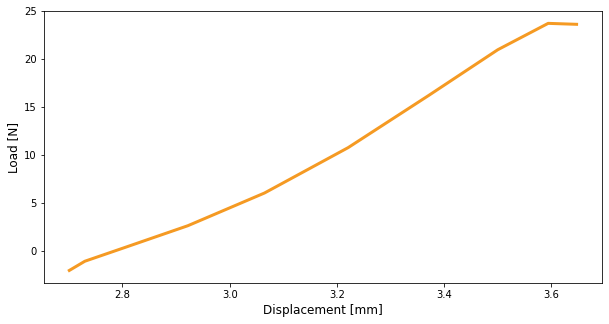

In [ ]:
# Plot harmonic data
fig = plt.figure(figsize=(10, 5))
plt.plot(
    disp_h[3946:cycle_h['1']],
    load_h[3946:cycle_h['1']],
    color=naranjo,
    linewidth=3
)
plt.xlabel('Displacement [mm]', fontsize=12)
plt.ylabel('Load [N]', fontsize=12)
# plt.title('Harmonic (Load vs. Displacement)', fontsize=14)
plt.show()

In [ ]:
e_loss = integrate.simpson(
      load_h[3946:cycle_h['1']],
      disp_h[3946:cycle_h['1']],
      axis=-1,
      even='avg'
   )
print(f'Energía disipada:', '%.4E' % Decimal(e_loss), 'J')

Energía disipada: -9.8101E+00 J


In [ ]:
e_loss = integrate.simps(
      load_h[cycle_h['0']:3946],
      disp_h[cycle_h['0']:3946],
      axis=-1,
      even='avg'
   )
print(f'Energía disipada:', '%.4E' % Decimal(e_loss ), 'J')

Energía disipada: 3.6482E+00 J


In [ ]:
e_loss = np.trapz(
      load_h[3946:cycle_h['1']],
      disp_h[3946:cycle_h['1']]
   )
print(f'Energía disipada:', '%.4E' % Decimal(e_loss), 'J')

Energía disipada: -9.8106E+00 J


#### Hecho con :heart: por Iván Vergara Lam